##### **5 역전파 (Backpropagation)**
https://github.com/WegraLee/deep-learning-from-scratch

https://sdr1982.tistory.com/201#google_vignette





---

#### **연쇄법칙 (Chain rule)**

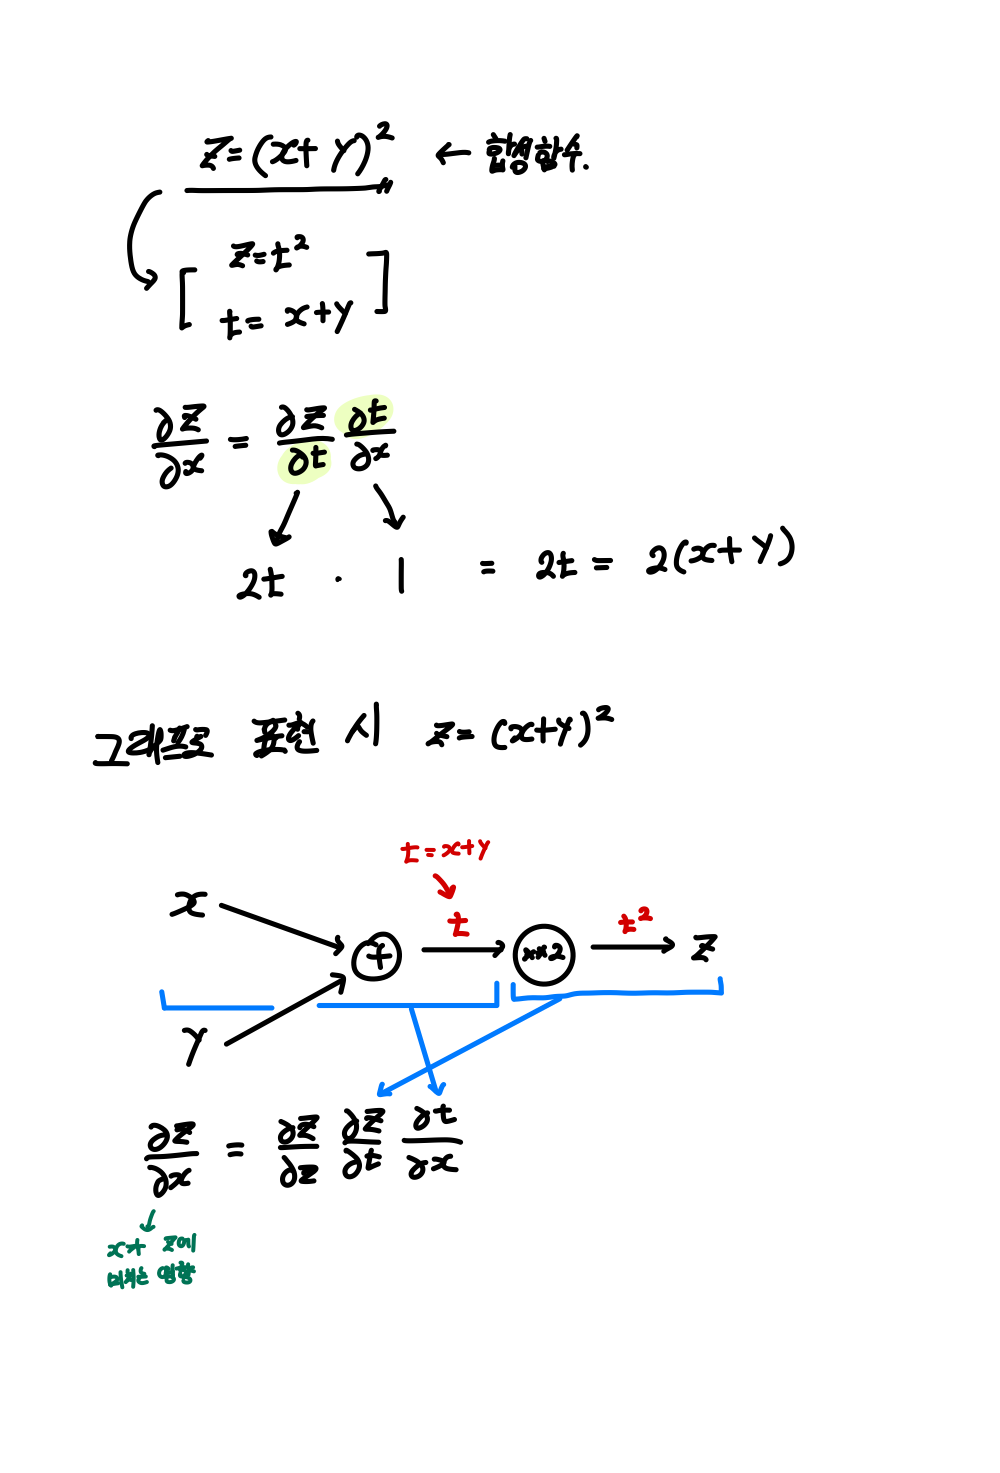

In [2]:
from IPython.display import Image, display
display(Image(filename='images/1.png', embed=True))

$$x, y \xrightarrow{+} t \xrightarrow{**2} z \xrightarrow{\text{Loss function}} L$$

$$\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial t} \cdot \frac{\partial t}{\partial x}$$

이러한 방식으로 어떠한 입력이 Loss에 어떤 영향을 미치는지 끝에서부터 역으로 가면서 미분을 통해 구하는 것을 Backpropagation이라고 한다.

이렇게 해서 파라미터 (weight, bias)가 Loss에 각각 얼마나 영향을 미치는지 행렬형태로 나타내는 이것을 Gradient라 한다.

In [ ]:
import buy_apple    # 
from layer_naive import MulLayer # 곱셈 계층 인터페이스

# 1. 객체 생성
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 2. 순전파 (Forward)
apple = 100
apple_num = 2
tax = 1.1

apple_price = mul_apple_layer.forward(apple, apple_num) # 여기서 self.x=100, self.y=2 저장
price = mul_tax_layer.forward(apple_price, tax)         # 여기서 self.x=200, self.y=1.1 저장

# 3. 역전파 (Backward)
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)      # 이제 self.y(1.1)를 꺼내서 계산 가능!
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


---

##### **수치미분과 역전파 차이**

**수치미분**
"일단 하나씩 살짝 바꿔보고 결과가 어떻게 변하는지 지켜보는" 노가다 방식

- 1. 현재 Loss 측정
- 2. 어떠한 가중치 $w_1$만 조금 늘리고 다시 순전파를 통해 Loss 계산
- 3. 두 값의 차이로 $w_1$의 gradient구함
- 4. 모든 파라미터에 대해 반복 (파라미터가 100개라면 순전파 100번)


**Backpropagation**
끝에서부터 오차 신호를 한꺼번에 뒤로 뿌려주는" 효율적인 방식

- 1. 현재 Loss 측정
- 2. Chain Rule 이용해, **상류(출력쪽)에서 온 미분 값에 현재 노드의 미분(기울기)을 곱하여 하류로 전달**한다.
    - 즉, chain rule이 곱하는 형태로 분자분모를 약분하는 형태니까
    - $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}$

---

##### **학습 과정 정리**

- 1. 순전파 (Forward): 데이터를 넣고 쭉 진행시켜서 **"얼마나 틀렸는지(Loss)"**를 계산함. <br>
    - 입력값 $X$와 가중치 $W$를 메모리에 저장
    - bias는 덧셈이므로 미분값이 1이다.
        - 즉, 해당 노드의 입력이 loss에 얼마나 영향을 미쳤는지에 따라 bias의 gradient가 달라진다.

- 2. 역전파(Backward): Loss에 각 파라미터(weight, bias)가 얼마나 영향을 미치는가를 chain rule을 통해 계산하여 gradient를 구한다.

- 3. 업데이트(step) : 구한 gradient에 learning rate를 곱해 기존 파라미터 (W,B)에서 빼줌으로써 업데이트한다.
    - $W_{new} = W_{old} - (\eta \times \text{Gradient})$ 


---

##### **Affine 계층**

- Affine Transformation : 신경망의 순전파 때 수행하는 행렬의 곱 $$Y = X \cdot W + B$$

    - 이러한 변환을 수행하는 처리를 `Affine 계층`이라고 함

---

##### **Softmax**

- 입력 값을 정규화해서 출력함
- 학습시에만 사용하고, 추론시에는 사용하지 않음.
    - 학습 시에는 정확한 Loss를 구해서 파라미터 업데이트를 위해 사용
    - 추론 시에는 가장 높은 값을 바로 출력하면 되므로 affine 계층 출력(=score)

##### **Softmax-with-Loss**

- softmax 계층 + Cross Entropy Error 계층
    - Softmax 계층: 입력 (a1, a2, a3)를 정규화하여 (y1, y2, y3)를 출력
    - Cross Entropy 계층: Softmax의 출력(y1, y2, y3)과 정답 레이블(t1, t2, t3)를 받고, 손실 L을 출력
        - CEE는 log를 취해 오차가 클수록 큰 Loss가 나옴.


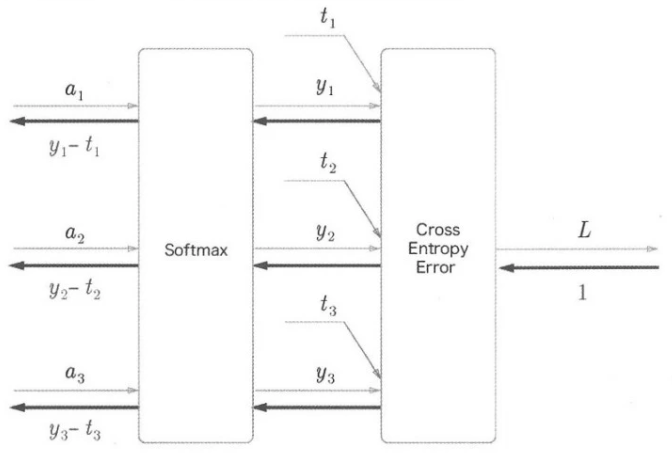

In [8]:
from IPython.display import Image, display
display(Image(filename='images/2.png', embed=True))

Softmax-with-Loss 계층의 역전파 결과는 $y-t$이다.


이는 softmax의 출력(신경망 현채 예측값;y)과 실제 정답 레이블(t)의 차이를 의미한다.


**예를 들어보면**

**정답 레이블(t) = (0, 1, 0)**

- **많이 틀렸을 때** <br>
    - 출력(y) = (0.3, 0.2, 0.5)<br>
    - y - t = (0.3, -0.8, 0.5)<br>
        - 큰 오차를 전파함 (big 업데이트)

- **많이 맞췄을 때**<br>
    - 출력(y) = (0.01, 0.99, 0.0)<br>
    - y - t = (0.01, -0.1, 0.0)<br>
        - 작은 오차를 전파함 (거의 업데이트 X)



Regression 문제의 MSE도 마찬가지로 역전파 값이 $y-t$로 동일함.